**I. Loading dataset**

In [35]:
import pandas as pd

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 500)
#pd.set_option('display.max_colwidth', None)

df = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


**II. Cleaning dataset**

*II.1 Infos*

In [36]:
# Select text features
df = df[['product_name', 'product_category_tree',
         'description', 'product_specifications', 'brand']]

In [37]:
df.shape

(1050, 5)

In [38]:
df.head()

,product_name,product_category_tree,description,product_specifications,brand
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",Key Features of Elegance Polyester Multicolor ...,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Elegance
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Specifications of Sathiyas Cotton Bath Towel (...,"{""product_specification""=>[{""key""=>""Machine Wa...",Sathiyas
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Key Features of Eurospa Cotton Terry Face Towe...,"{""product_specification""=>[{""key""=>""Material"",...",Eurospa
3,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of SANTOSH ROYAL FASHION Cotton P...,"{""product_specification""=>[{""key""=>""Brand"", ""v...",SANTOSH ROYAL FASHION
4,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of Jaipur Print Cotton Floral Kin...,"{""product_specification""=>[{""key""=>""Machine Wa...",Jaipur Print


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   product_name            1050 non-null   object
 1   product_category_tree   1050 non-null   object
 2   description             1050 non-null   object
 3   product_specifications  1049 non-null   object
 4   brand                   712 non-null    object
dtypes: object(5)
memory usage: 41.1+ KB


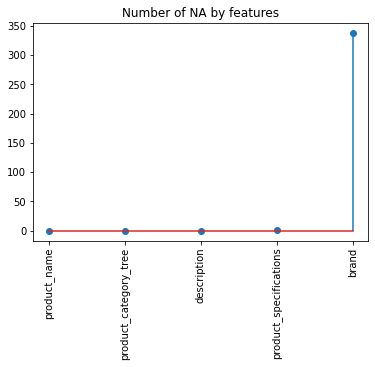

In [40]:
import matplotlib.pyplot as plt

plt.stem(df.isna().sum().index, df.isna().sum().values)
plt.title('Number of NA by features')
plt.xticks(rotation=90)

plt.show()

In [41]:
df.isna().sum()

product_name                0
product_category_tree       0
description                 0
product_specifications      1
brand                     338
dtype: int64

*II.2 NA drop*

In [42]:
# Drop brand column and the unique row with a NA
df.drop(columns='brand', inplace=True)
df.dropna(inplace=True)

df

,product_name,product_category_tree,description,product_specifications
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",Key Features of Elegance Polyester Multicolor ...,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Specifications of Sathiyas Cotton Bath Towel (...,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Key Features of Eurospa Cotton Terry Face Towe...,"{""product_specification""=>[{""key""=>""Material"",..."
3,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of SANTOSH ROYAL FASHION Cotton P...,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of Jaipur Print Cotton Floral Kin...,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Oren Empower Extra Large Self Adhesive Sticker...,"{""product_specification""=>[{""key""=>""Number of ..."
1046,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Wallmantra Large Vinyl Sticker Sticker (Pack o...,"{""product_specification""=>[{""key""=>""Number of ..."
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"{""product_specification""=>[{""key""=>""Number of ..."
1048,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"{""product_specification""=>[{""key""=>""Number of ..."


*II.3 Stop words and display topics function*

In [9]:
import nltk
from nltk.corpus import stopwords


def delete_stop_words(df, n):
    """Function to delete stop words in a dataframe.
    The interest of the function : collect most common words and add it to the stopwords set.


    Use this function only if list of tokens are stored in pandas cell

    Return the new dataframe and the updated stopwords list."""

    # Create list to store the common words
    common_words = list()

    # Import the knowing english stop words
    stop_words = set(stopwords.words('english'))

    # Loop over lists and select the NOT stop words
    for col in df:
        df.loc[:, col] = df.loc[:, col].apply(
            lambda x: [item for item in x if item not in stop_words])

    for col in df:
        for elmnt in df.loc[:, col]:  # loop over lists in df
            common_words += elmnt  # append elements of lists to full list

    # Count the values of each token words
    val_counts = pd.Series(common_words).value_counts()

    # Store the n most frequent words
    common_words = list(val_counts.head(n).index)

    exception_words = ['watch', 'baby', 'mug', 'cotton', 'girl', 'price',
                       'care', 'analog', 'showpiece', 'men', 'design', 'home',
                       'usb', 'laptop', 'boy', 'dial',
                       'woman', 'water', 'ceramic', 'battery']

    for i in exception_words:
        common_words.remove(i)

    print(common_words)

    # Update the set of stop words
    stop_words.update(common_words)

    # Loop over lists and select the NOT stop words
    for col in df:
        df.loc[:, col] = df.loc[:, col].apply(
            lambda x: [item for item in x if item not in stop_words])

    return df, stop_words


def display_topics(model, feature_names, no_top_words):
    """Function that display the topics modelled and the most important word in each one"""
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([
            feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]
        ]))

**III. Normalize dataset**

In [10]:
# Work with dataframe as string object
df = df.astype('string')

# Lower the words case
for col in df:
    df.loc[:, col] = df.loc[:, col].str.lower()

*III.1 Bag of words*

In [11]:
from nltk import RegexpTokenizer

# Using regex to select the only cases we want
tokenizer = nltk.RegexpTokenizer(r'[a-z]\w+')

# Apply the tokenizer to the dF
for col in df:
    df.loc[:, col] = df.loc[:, col].apply(tokenizer.tokenize)

In [12]:
from nltk.stem import WordNetLemmatizer

# Create the model to lemmatize the words
lemmatizer = WordNetLemmatizer()

# Apply the model to the dF
for col in df:
    df.loc[:, col] = df.loc[:, col].apply(
        lambda x: [lemmatizer.lemmatize(word) for word in x])

In [13]:
# Use the function to delete stop words in the df
df, stop_words = delete_stop_words(df, 70)

['value', 'key', 'cm', 'type', 'color', 'material', 'product', 'package', 'sale', 'model', 'number', 'product_specification', 'warranty', 'r', 'brand', 'set', 'yes', 'pack', 'free', 'ideal', 'content', 'replacement', 'feature', 'inch', 'day', 'buy', 'width', 'genuine', 'delivery', 'strap', 'combo', 'cash', 'shipping', 'box', 'guarantee', 'mm', 'flipkart', 'com', 'name', 'weight', 'height', 'online', 'size', 'specification', 'black', 'ml', 'style', 'code', 'shape', 'length']


In [14]:
df['concat_features'] = df['product_name'] + df['product_category_tree'] + \
    df['description'] + df['product_specifications']

In [15]:
df = df.apply(lambda x: [' '.join(row) for row in x])

df.head()

,product_name,product_category_tree,description,product_specifications,concat_features
0,elegance polyester multicolor abstract eyelet ...,home furnishing curtain accessory curtain eleg...,elegance polyester multicolor abstract eyelet ...,elegance designed door eyelet abstract polyest...,elegance polyester multicolor abstract eyelet ...
1,sathiyas cotton bath towel,baby care baby bath skin baby bath towel sathi...,sathiyas cotton bath towel bath towel red yell...,machine washable cotton design self design sat...,sathiyas cotton bath towel baby care baby bath...
2,eurospa cotton terry face towel,baby care baby bath skin baby bath towel euros...,eurospa cotton terry face towel small gsm euro...,cotton terry design shuvam eurospa gsm face to...,eurospa cotton terry face towel baby care baby...
3,santosh royal fashion cotton printed king size...,home furnishing bed linen bedsheets santosh ro...,santosh royal fashion cotton printed king size...,santosh royal fashion machine washable flat co...,santosh royal fashion cotton printed king size...
4,jaipur print cotton floral king sized double b...,home furnishing bed linen bedsheets jaipur pri...,jaipur print cotton floral king sized double b...,machine washable jaipur print flat jaipur117 c...,jaipur print cotton floral king sized double b...


In [16]:
print(df['concat_features'][0])

elegance polyester multicolor abstract eyelet door curtain home furnishing curtain accessory curtain elegance polyester multicolor abstract eyelet elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain price curtain enhances look interior curtain made high quality polyester fabric eyelet stitch metal ring make room environment romantic loving curtain ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlight elegance polyester multicolor abstract eyelet door curtain general elegance designed door eyelet abstract polyester door curtain id duster25 multicolor 

In [17]:
df.shape

(1049, 5)

*III.5 LDA*

In [18]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

unigram = dict()
bigram = dict()
trigram = dict()
ubgram = dict()
utgram = dict()

# Initialize some count vectorizer with 1, 2, 3,
# 1to2 or 1to3 n-grams
tfvec_uni = CountVectorizer(min_df=30, max_df=0.9, stop_words=stop_words)

tfvec_bi = CountVectorizer(min_df=30,
                           max_df=0.9,
                           ngram_range=(2, 2),
                           stop_words=stop_words)

tfvec_tri = CountVectorizer(min_df=30,
                            max_df=0.9,
                            ngram_range=(3, 3),
                            stop_words=stop_words)

tfvec_ub = CountVectorizer(min_df=30,
                           max_df=0.9,
                           ngram_range=(1, 2),
                           stop_words=stop_words)

tfvec_ut = CountVectorizer(min_df=30,
                           max_df=0.9,
                           ngram_range=(1, 3),
                           stop_words=stop_words)

# Fit and transform the bag of words
tf_uni = tfvec_uni.fit_transform(df['concat_features'])
tf_bi = tfvec_bi.fit_transform(df['concat_features'])
tf_tri = tfvec_tri.fit_transform(df['concat_features'])
tf_ub = tfvec_ub.fit_transform(df['concat_features'])
tf_ut = tfvec_ut.fit_transform(df['concat_features'])

# Collect the features
tf_feat_uni = tfvec_uni.get_feature_names()
tf_feat_bi = tfvec_bi.get_feature_names()
tf_feat_tri = tfvec_tri.get_feature_names()
tf_feat_ub = tfvec_ub.get_feature_names()
tf_feat_ut = tfvec_ut.get_feature_names()

# Set the parameters for grid search
lda_param = {
    'n_components': range(7, 9),
    'max_iter': [5, 10],
    'learning_decay': [0.5, 0.7, 0.9],
    'learning_method': ['online'],
    #    'learning_offset': [10, 20, 50],
    'random_state': [0]
}

lda = LatentDirichletAllocation()

# Initiate the grid search
grid1 = GridSearchCV(lda, param_grid=lda_param)
grid2 = GridSearchCV(lda, param_grid=lda_param)
grid3 = GridSearchCV(lda, param_grid=lda_param)
grid4 = GridSearchCV(lda, param_grid=lda_param)
grid5 = GridSearchCV(lda, param_grid=lda_param)

# Fit all the n-grams
grid_uni = grid1.fit(tf_uni)
print('unigram with LDA done')
grid_bi = grid2.fit(tf_bi)
print('bigram with LDA done')
grid_tri = grid3.fit(tf_tri)
print('trigram with LDA done')
grid_ub = grid4.fit(tf_ub)
print('1 to 2gram with LDA done')
grid_ut = grid5.fit(tf_ut)
print('1 to 3gram with LDA done')

# Record the results
unigram['shape'] = tf_uni.shape
bigram['shape'] = tf_bi.shape
trigram['shape'] = tf_tri.shape
ubgram['shape'] = tf_ub.shape
utgram['shape'] = tf_ut.shape

unigram['bestmodels'] = grid_uni.best_params_
bigram['bestmodels'] = grid_bi.best_params_
trigram['bestmodels'] = grid_tri.best_params_
ubgram['bestmodels'] = grid_ub.best_params_
utgram['bestmodels'] = grid_ut.best_params_

unigram['likelyhood'] = grid_uni.best_score_
bigram['likelyhood'] = grid_bi.best_score_
trigram['likelyhood'] = grid_tri.best_score_
ubgram['likelyhood'] = grid_ub.best_score_
utgram['likelyhood'] = grid_ut.best_score_

best_lda_uni = LatentDirichletAllocation(**unigram['bestmodels']).fit(tf_uni)
best_lda_bi = LatentDirichletAllocation(**unigram['bestmodels']).fit(tf_bi)
best_lda_tri = LatentDirichletAllocation(**unigram['bestmodels']).fit(tf_tri)
best_lda_ub = LatentDirichletAllocation(**unigram['bestmodels']).fit(tf_ub)
best_lda_ut = LatentDirichletAllocation(**unigram['bestmodels']).fit(tf_ut)

unigram['perplexity'] = best_lda_uni.perplexity(tf_uni)
bigram['perplexity'] = best_lda_bi.perplexity(tf_bi)
trigram['perplexity'] = best_lda_tri.perplexity(tf_tri)
ubgram['perplexity'] = best_lda_ub.perplexity(tf_ub)
utgram['perplexity'] = best_lda_ut.perplexity(tf_ut)

unigram with LDA done
bigram with LDA done
trigram with LDA done
1 to 2gram with LDA done
1 to 3gram with LDA done


In [19]:
unigram = pd.Series(unigram, name='unigram')
bigram = pd.Series(bigram, name='bigram')
trigram = pd.Series(trigram, name='trigram')
ubgram = pd.Series(ubgram, name='1-2gram')
utgram = pd.Series(utgram, name='1-3gram')

In [20]:
LDAresults = pd.DataFrame(pd.concat([unigram, bigram, trigram, ubgram, utgram], axis=1))
LDAresults

,unigram,bigram,trigram,1-2gram,1-3gram
shape,"(1049, 241)","(1049, 125)","(1049, 79)","(1049, 366)","(1049, 445)"
bestmodels,"{'learning_decay': 0.5, 'learning_method': 'on...","{'learning_decay': 0.5, 'learning_method': 'on...","{'learning_decay': 0.9, 'learning_method': 'on...","{'learning_decay': 0.7, 'learning_method': 'on...","{'learning_decay': 0.7, 'learning_method': 'on..."
likelyhood,-39733.80037,-8775.793902,-3894.819252,-53251.155218,-59403.243188
perplexity,71.491943,32.216908,29.902445,99.112704,102.914762


<StemContainer object of 3 artists>

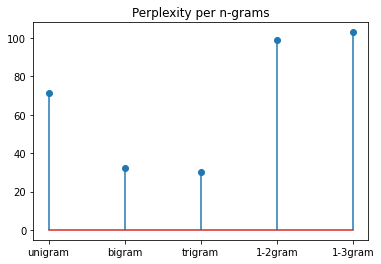

In [21]:
plt.title('Perplexity per n-grams')
plt.stem(LDAresults.columns, LDAresults.iloc[3, :].values)

<StemContainer object of 3 artists>

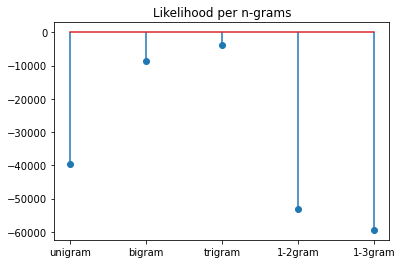

In [22]:
plt.title('Likelihood per n-grams')
plt.stem(LDAresults.columns, LDAresults.iloc[2, :].values)

In [23]:
print(LDAresults['1-2gram']['bestmodels'])
print(LDAresults['1-3gram']['bestmodels'])

{'learning_decay': 0.7, 'learning_method': 'online', 'max_iter': 10, 'n_components': 7, 'random_state': 0}
{'learning_decay': 0.7, 'learning_method': 'online', 'max_iter': 10, 'n_components': 8, 'random_state': 0}


In [24]:
display_topics(best_lda_ub, tf_feat_ub, 10)

Topic 0:
design polyester blanket brown home single id furnishing washable home furnishing
Topic 1:
light blue kitchen led price dark glass white water plastic
Topic 2:
watch analog men dial analog watch woman wrist wrist watch resistant water
Topic 3:
showpiece wall home cover decor price home decor need festive room
Topic 4:
laptop print usb accessory quality computer battery multicolor high summary
Topic 5:
covered adapter service power port router wireless usb steel damage
Topic 6:
baby skin girl cotton care baby girl fabric boy towel baby boy
Topic 7:
mug ceramic coffee safe coffee mug ceramic mug care gift beauty perfect


In [25]:
display_topics(best_lda_ut, tf_feat_ut, 10)

Topic 0:
mug ceramic kitchen coffee safe coffee mug ceramic mug dining kitchen dining capacity
Topic 1:
design polyester blanket towel home cotton brown id single double
Topic 2:
showpiece wall home decor price best gift home decor need festive
Topic 3:
watch analog dial analog watch wrist men wrist watch water resistant woman
Topic 4:
care beauty deodorant men personal personal care beauty personal beauty personal care woman kit
Topic 5:
usb light covered battery power led adapter service port router
Topic 6:
baby girl baby girl fabric cotton boy care cover baby boy pattern
Topic 7:
laptop skin print multicolor quality accessory easy computer high price


In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

panel = pyLDAvis.sklearn.prepare(best_lda_ub, tf_ub, tfvec_ub, mds='tsne')
panel

In [ ]:
import warnings
warnings.filterwarnings("ignore") 

In [ ]:
pyLDAvis.save_html(panel, 'LDAvis.html')

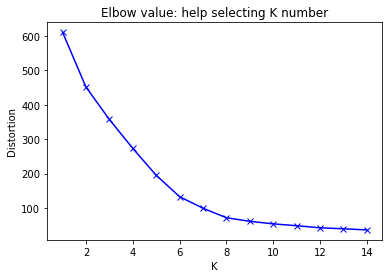

In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Check the best number of topics with Kmeans
out_lda = best_lda_ub.transform(tf_ub)
distortions = list()

K = range(1, 15)

for k in K:
    k_res = KMeans(n_clusters=k)
    k_res.fit(out_lda)
    distortions.append(k_res.inertia_)

# Plot the results
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Elbow value: help selecting K number')

plt.show()

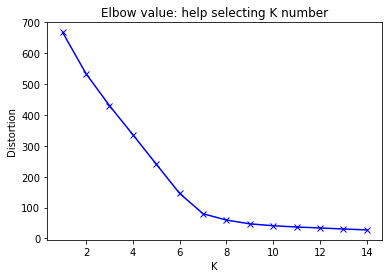

In [27]:
# Check the best number of topics with Kmeans
out_lda = best_lda_ut.transform(tf_ut)
distortions = list()

K = range(1, 15)

for k in K:
    k_res = KMeans(n_clusters=k)
    k_res.fit(out_lda)
    distortions.append(k_res.inertia_)

# Plot the results
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Elbow value: help selecting K number')

plt.show()

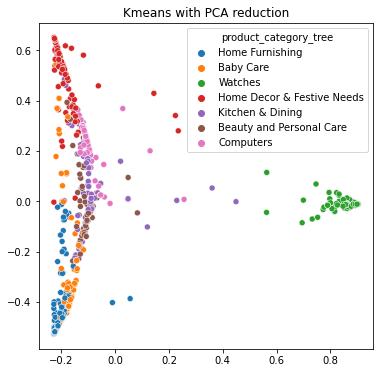

In [49]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.manifold import Isomap, TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


# Predict with kmeans clustering
kmeans = KMeans(n_clusters=7, init='k-means++').fit(out_lda)
y_pred = kmeans.predict(out_lda)

# Apply some reduction dimension
pca = PCA(n_components=2)
out_pca = pca.fit_transform(out_lda)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
sns.scatterplot(x=out_pca[:, 0], y=out_pca[:, 1], hue=df['product_category_tree'])
plt.title('Kmeans with PCA reduction')


plt.show()

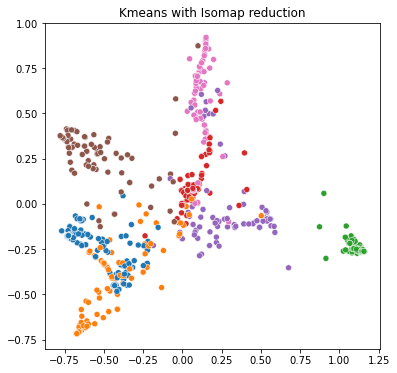

In [52]:
out_iso = Isomap(n_components=2, n_neighbors=40).fit_transform(out_lda)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
sns.scatterplot(x=out_iso[:, 0], y=out_iso[:, 1], hue=df['product_category_tree'], legend=False)
plt.title('Kmeans with Isomap reduction')

plt.show()

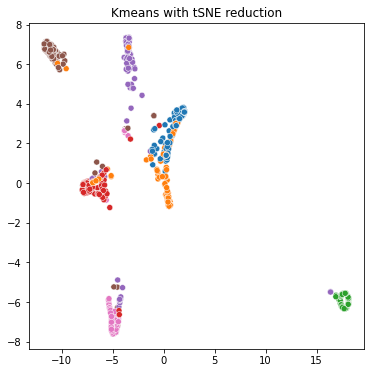

In [53]:
out_tsne = TSNE(n_components=2,
                perplexity=170,
                early_exaggeration=1,
                n_iter=2000).fit_transform(out_lda)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
sns.scatterplot(x=out_tsne[:, 0], y=out_tsne[:, 1], hue=df['product_category_tree'], legend=False)
plt.title('Kmeans with tSNE reduction')

plt.show()

In [47]:
from sklearn import metrics

# Print the results 
models = {
    'LDA': out_lda, 
    'ISO': out_iso,
    'PCA': out_pca,
    'tSNE': out_tsne
}

for i, j in models.items():
    print('*****', i, '*****')
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(j, kmeans.labels_))
    print("Davies Bouldin score: %0.3f"
      % metrics.davies_bouldin_score(j, kmeans.labels_))

***** LDA *****
Silhouette Coefficient: 0.707
Davies Bouldin score: 0.480
***** ISO *****
Silhouette Coefficient: 0.600
Davies Bouldin score: 0.579
***** PCA *****
Silhouette Coefficient: 0.408
Davies Bouldin score: 1.392
***** tSNE *****
Silhouette Coefficient: 0.782
Davies Bouldin score: 0.305


In [ ]:
from wordcloud import WordCloud 

terms_count = 10

for idx, topic in enumerate(best_lda_ut.components_):    
    print('Topic# ',idx+1)
    abs_topic = abs(topic)
    topic_terms = [[tf_feat_ut[i],topic[i]] for i in abs_topic.argsort()[:-terms_count-1:-1]]
    topic_terms_sorted = [[tf_feat_ut[i], topic[i]] for i in abs_topic.argsort()[:-terms_count - 1:-1]]
    topic_words = []
    
    for i in range(terms_count):
        topic_words.append(topic_terms_sorted[i][0])
    print(','.join( word for word in topic_words))
    print("")
    dict_word_frequency = {}

    for i in range(terms_count):
        dict_word_frequency[topic_terms_sorted[i][0]] = topic_terms_sorted[i][1]
    
    # Record the word clouds as png 
    wcloud = WordCloud(background_color="white",mask=None, max_words=100,\
                        max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                        contour_width=3,contour_color='black')
    wcloud.generate_from_frequencies(dict_word_frequency)       
    plt.imshow(wcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig("Topic#"+str(idx+1), format="png")

In [43]:
import re

# Collect labels
df['product_category_tree'] = df['product_category_tree'].apply(
    lambda x: re.split(' >>', x[2:]))
df['product_category_tree'] = df['product_category_tree'].apply(lambda x: x[0])

df['product_category_tree'].value_counts()

Beauty and Personal Care      150
Computers                     150
Baby Care                     150
Watches                       150
Kitchen & Dining              150
Home Furnishing               150
Home Decor & Festive Needs    149
Name: product_category_tree, dtype: int64

In [ ]:
# Run the notebook below to use needed function
%run P6_D_BenchmarkFunction.ipynb

In [ ]:
# List of models are accepted by the function below
models_B = list([
    dum(),
    ran_for([50, 75, 100, 125], ['gini', 'entropy']),
    #grad_boo(['deviance'], [0.01, 0.1, 0.3, 0.5], [50, 75, 100, 125]),
    xg_boo([50, 75, 100, 125, 150, 175, 200], ['gbtree', 'dart']),
    knn([3, 5, 7, 9], ['uniform', 'distance']),
    svc(['l1', 'l2'], ['squared_hinge']),
    svc_kern(np.arange(0.5, 1, 30), ['poly', 'rbf', 'sigmoid'])
])

In [ ]:
# Launch the benchmark with standardizer
standard_results = model_benchmark(test, df['product_category_tree'], 'standard', models_B)
standard_results['perf'].round(2)

In [ ]:
# Launch the benchmark with normalizer
normal_results = model_benchmark(test, df['product_category_tree'], 'normal', models_B)
normal_results['perf'].round(2)

In [ ]:
# Concatenate the results
all_results = pd.concat([
    standard_results['perf'],
    normal_results['perf']
])

# Plot the results
title = 'Accuracy on test sets : Recognition text categories based on LDA output'
ax = all_results.iloc[[1, 4], :].T.plot.bar(figsize=(12, 6), title=title)
ax.legend(['Standardizer', 'Normalizer']);